In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read file into a dataframe
d = pd.read_csv("final_cleaned_data.csv")

In [4]:
#features that we have
d.columns

Index(['Unnamed: 0', 'backers_count', 'blurb', 'category', 'country',
       'created_at', 'currency', 'current_currency', 'deadline', 'goal',
       'launched_at', 'name', 'pledged', 'slug', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'usd_pledged', 'avgAmountPledged',
       'slug_length', 'state_bool', 'launched_date', 'deadline_date',
       'created_date', 'state_changed_at_date', 'launch_year', 'launch_month',
       'launch_month_name', 'launch_day', 'launch_day_name', 'campaign_days',
       'creation_to_launch_days', 'state_changed_at_year',
       'state_changed_at_month', 'state_changed_at_month_name',
       'state_changed_at_day', 'state_changed_at_day_name', 'sub_category',
       'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH',
       'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB',
       'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU',
       'country_MX', 'country_NL', 'country_NO', 'cou

In [44]:
#Only successful projects from all projects
d_s = d[d['state_bool'] == 1]

In [45]:
#Number of projects we have
len(d)

169962

In [46]:
#Projects that were staff picked
newDF_staff = d[d['staff_pick'] == 1]

In [47]:
len(newDF_staff)

21880

In [48]:
#Projects that were staff picked and failed
newDF_staff_f = newDF_staff[newDF_staff['state_bool'] == 0]

In [49]:
len(newDF_staff_f)

2214

In [50]:
#Projects that were staff picked and successful
newDF_staff_s = newDF_staff[newDF_staff['state_bool'] == 1]

In [51]:
len(newDF_staff_s)

19666

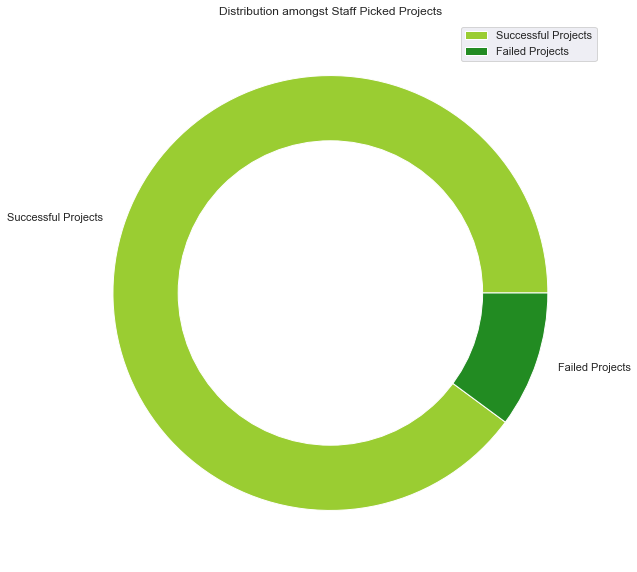

In [52]:
labels = ['Successful Projects','Failed Projects']
size = [len(newDF_staff_s),len(newDF_staff_f)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=labels,colors = ['yellowgreen','forestgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution amongst Staff Picked Projects", loc='center')
plt.legend(loc="upper right")
plt.savefig("staffpick_successful_failed.png")
plt.show()

In [53]:
##########Plots################

In [54]:
df = pd.read_csv("final_cleaned_data_sentiments.csv")

In [55]:
######### Save successful projects ###############

In [56]:
df_s = df[df['state_bool'] == 1]

In [57]:
len(df_s)

96768

In [58]:
######### Save failed projects ###############

In [59]:
df_f = df[df['state_bool'] == 0]

In [60]:
len(df_f)

73194

In [61]:
######### Number of successful projects that were staff picked  ###############

In [62]:
len(df_s[df_s['staff_pick']==1])

19666

In [63]:
######### Number of successful projects that were not staff picked  ###############

In [64]:
len(df_s[df_s['staff_pick']==0])

77102

In [65]:
############ Staff Pick ###################

In [66]:
sns.set(rc={'figure.figsize':(10,10)})

In [67]:
s_labels = ['Staff Pick','Non Staff Pick']
s_size = [len(df_s[df_s['staff_pick']==1]),len(df_s[df_s['staff_pick']==0]) ]

In [68]:
f_labels = ['Staff Pick','Non Staff Pick']
f_size = [len(df_f[df_f['staff_pick']==1]),len(df_f[df_f['staff_pick']==0]) ]

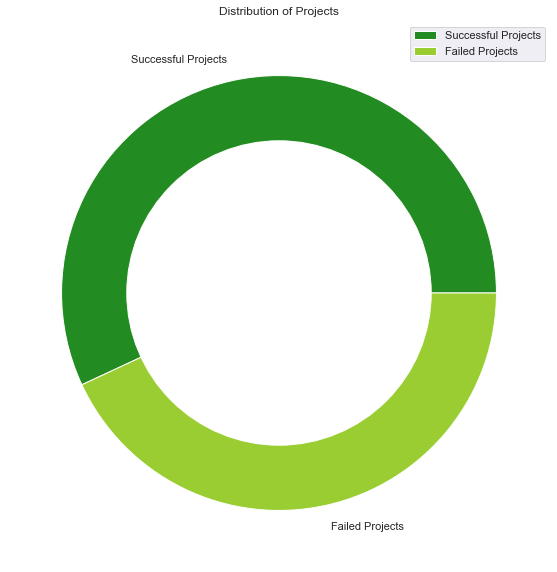

In [69]:
labels = ['Successful Projects','Failed Projects']
size = [len(df_s),len(df_f)]
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=labels,colors = ['forestgreen','yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Projects", loc='center')
plt.legend(loc="upper right")
plt.savefig("successful_failed.png")
plt.show()

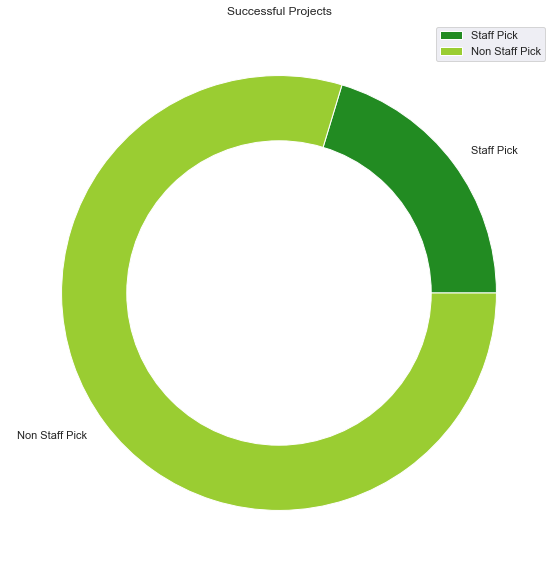

In [70]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(s_size, labels=s_labels,colors = ['forestgreen','yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Successful Projects", loc='center')
plt.legend(loc="upper right")
plt.savefig("successful_staff_pick.png")
plt.show()


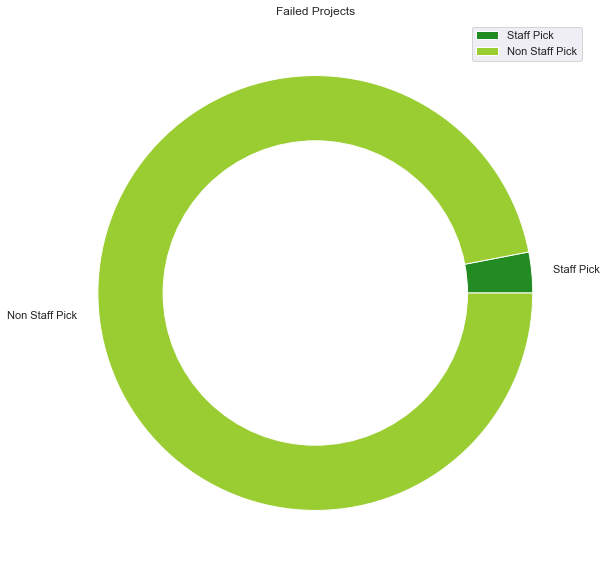

In [71]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(f_size, labels=f_labels,colors = ['forestgreen','yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Failed Projects", loc='center')
plt.legend(loc="upper right")
plt.savefig("failed_staff_pick.png")
plt.show()


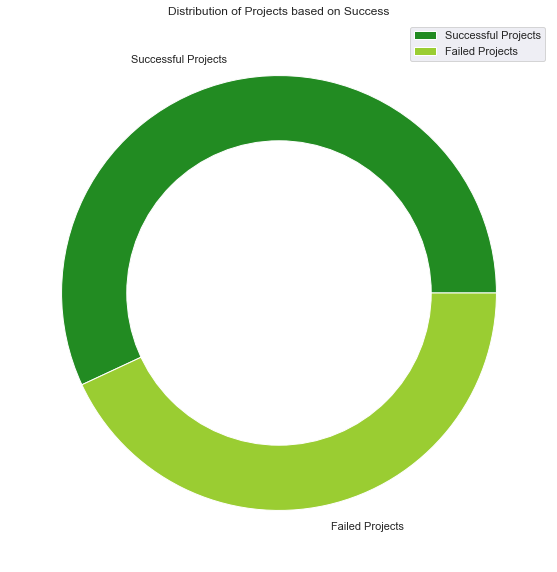

In [72]:
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie([len(df_s),len(df_f)], labels=["Successful Projects","Failed Projects"],colors = ['forestgreen','yellowgreen'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title("Distribution of Projects based on Success", loc='center')
plt.savefig("success_vs_failed_projects.png")
plt.legend(loc="upper right")
plt.show()


In [73]:
########### Goal vs Category ##################

In [74]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,12)})

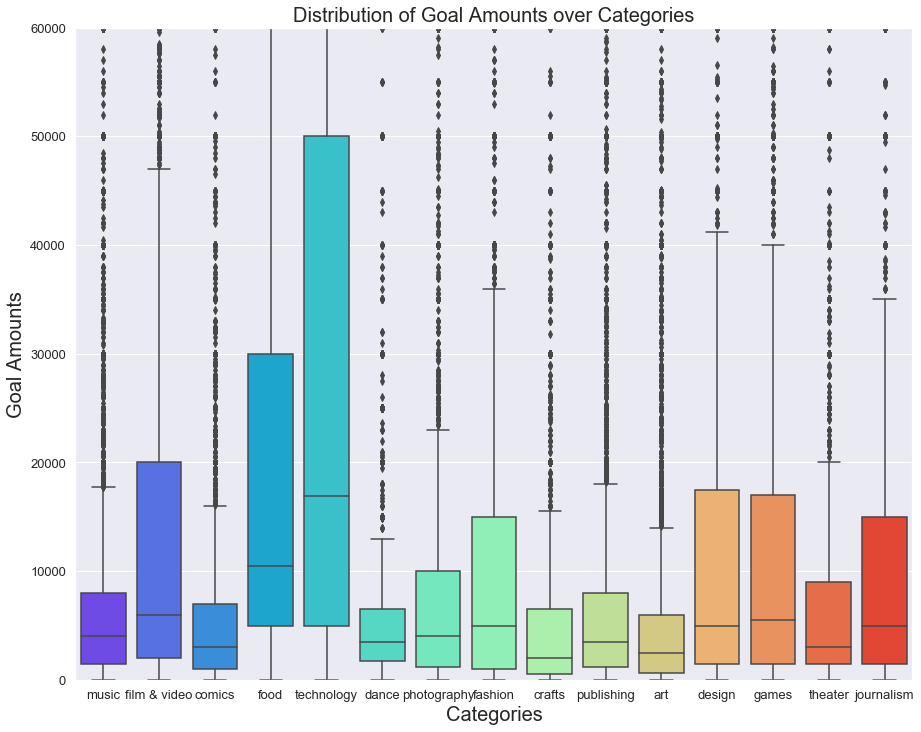

In [75]:
#All projects
ax = sns.boxplot(x='category',y='goal',data=d,palette='rainbow')
ax.set(ylim=(0,60000))
ax.axes.set_title("Distribution of Goal Amounts over Categories",fontsize=20)
ax.set_xlabel("Categories",fontsize=20)
ax.set_ylabel("Goal Amounts",fontsize=20)
ax.tick_params(labelsize=13)
plt.show()
fig = ax.get_figure()
fig.savefig('goal_category.png')

In [76]:
d_s = d[d['state_bool'] == 1]

In [77]:
len(d_s)

96768

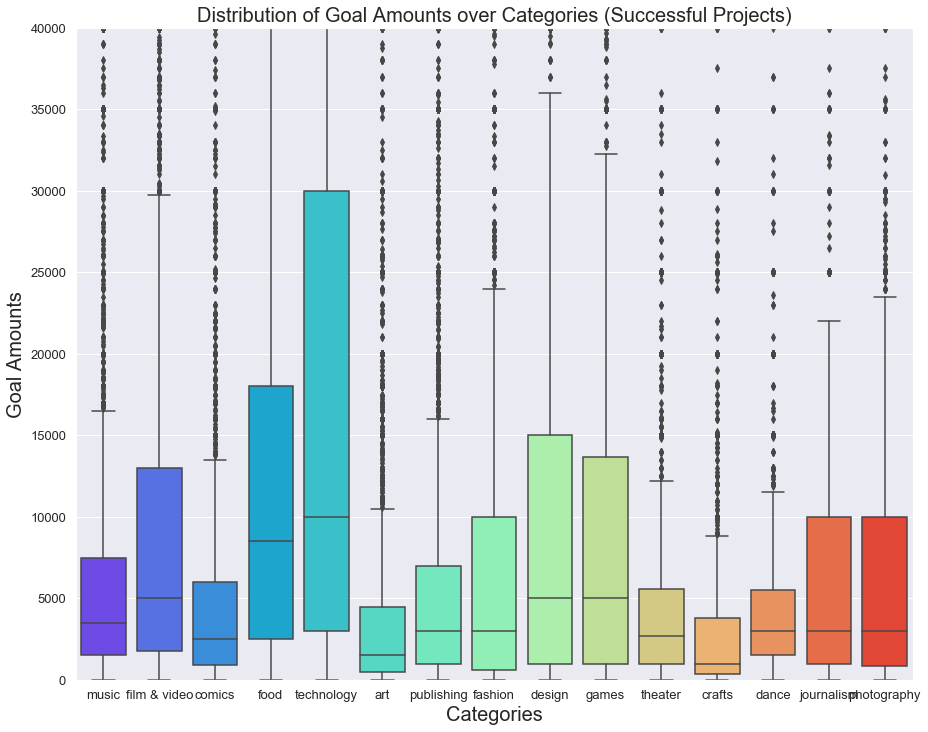

In [78]:
#Only successful projects
ax = sns.boxplot(x='category',y='goal',data=d_s,palette='rainbow')
ax.set(ylim=(0,40000))
ax.axes.set_title("Distribution of Goal Amounts over Categories (Successful Projects)",fontsize=20)
ax.set_xlabel("Categories",fontsize=20)
ax.set_ylabel("Goal Amounts",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('goal_category_successful.png')

In [79]:
################### Goal vs Launch Year ####################

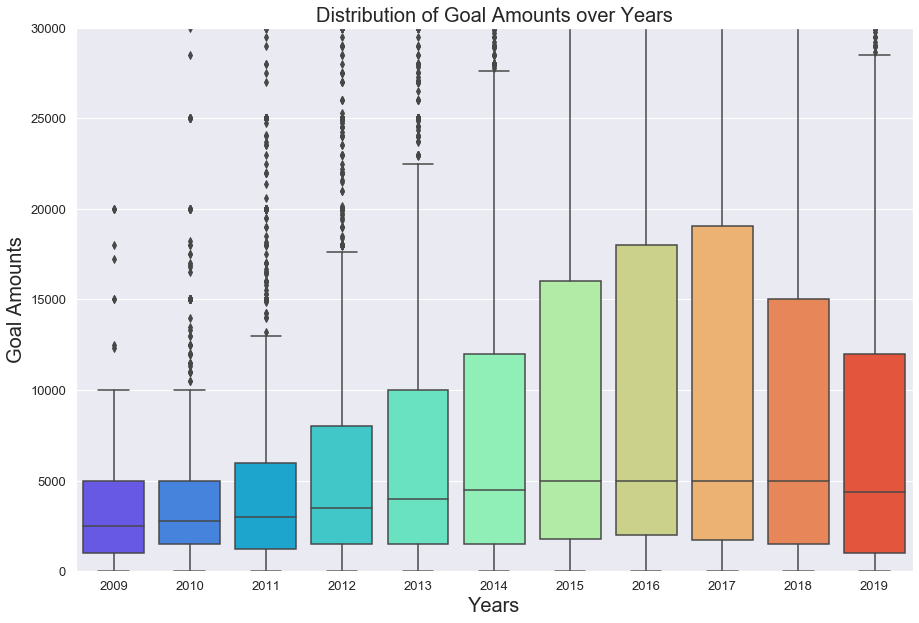

In [95]:
#All projects
ax = sns.boxplot(x='launch_year',y='goal',data=d,palette='rainbow')
ax.set(ylim=(0,30000))
ax.axes.set_title("Distribution of Goal Amounts over Years",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Goal Amounts",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('goal_year.png')

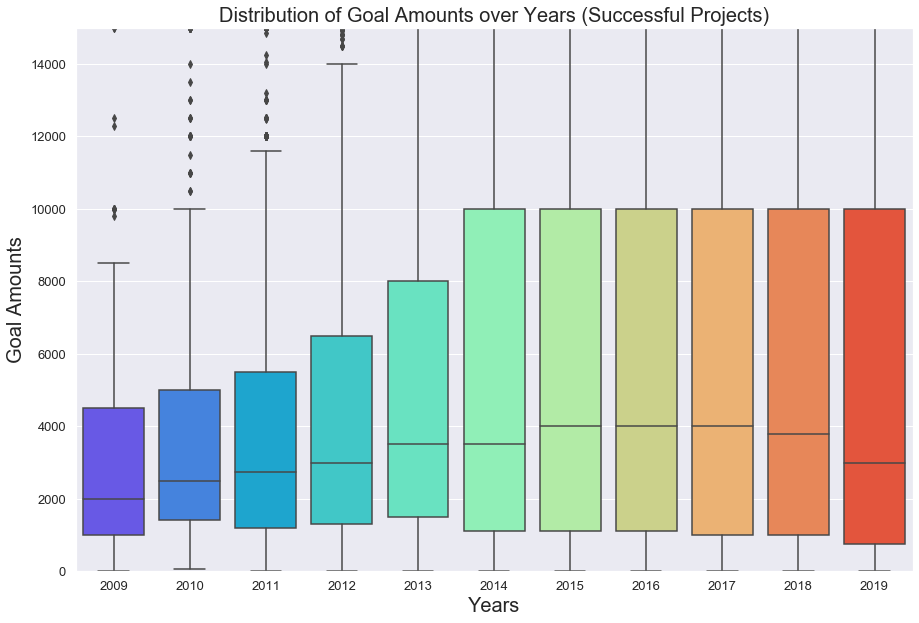

In [96]:
#Successful projects
ax = sns.boxplot(x='launch_year',y='goal',data=d_s,palette='rainbow')
ax.set(ylim=(0,15000))
ax.axes.set_title("Distribution of Goal Amounts over Years (Successful Projects)",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Goal Amounts",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('goal_year_successful.png')

In [82]:
################### Amount Pledged vs Launch Year ####################

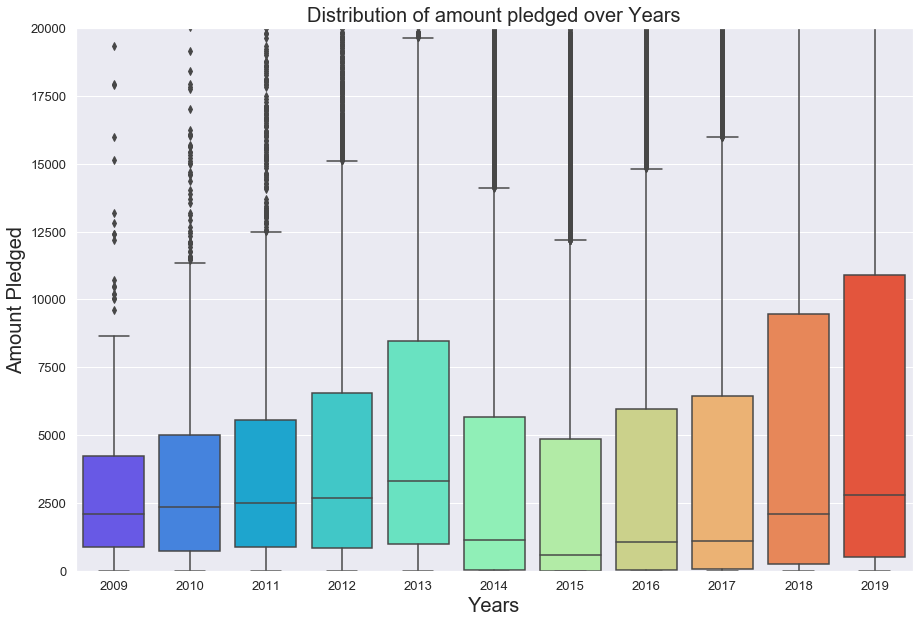

In [97]:
#All projects
ax = sns.boxplot(x='launch_year',y='pledged',data=d,palette='rainbow')
ax.set(ylim=(0,20000))
ax.axes.set_title("Distribution of amount pledged over Years",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('pledged_year.png')

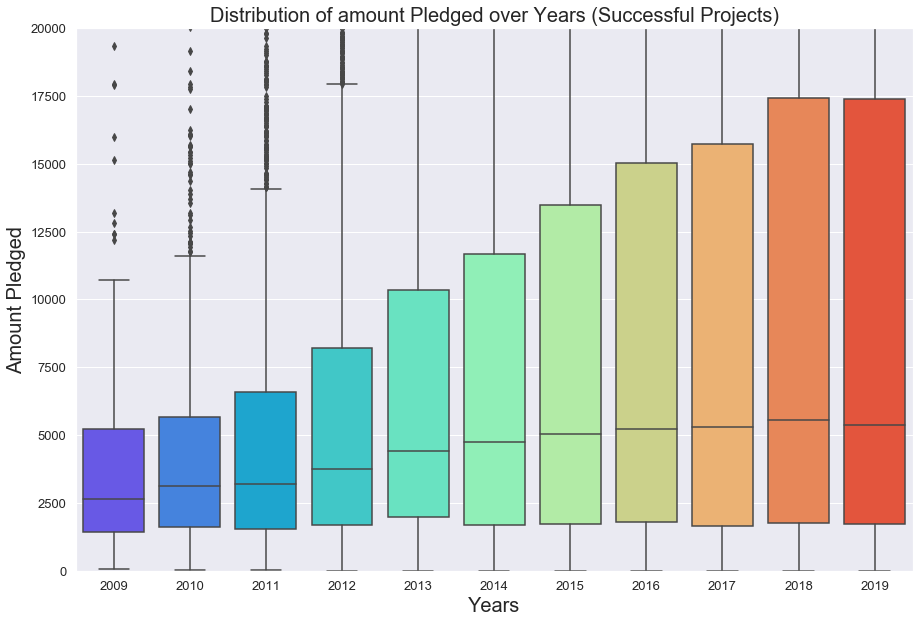

In [98]:
#Successful projects
ax = sns.boxplot(x='launch_year',y='pledged',data=d_s,palette='rainbow')
ax.set(ylim=(0,20000))
ax.axes.set_title("Distribution of amount Pledged over Years (Successful Projects)",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('pledged_year_successful.png')

In [85]:
############# Average Pledged Amount vs Year ###########################

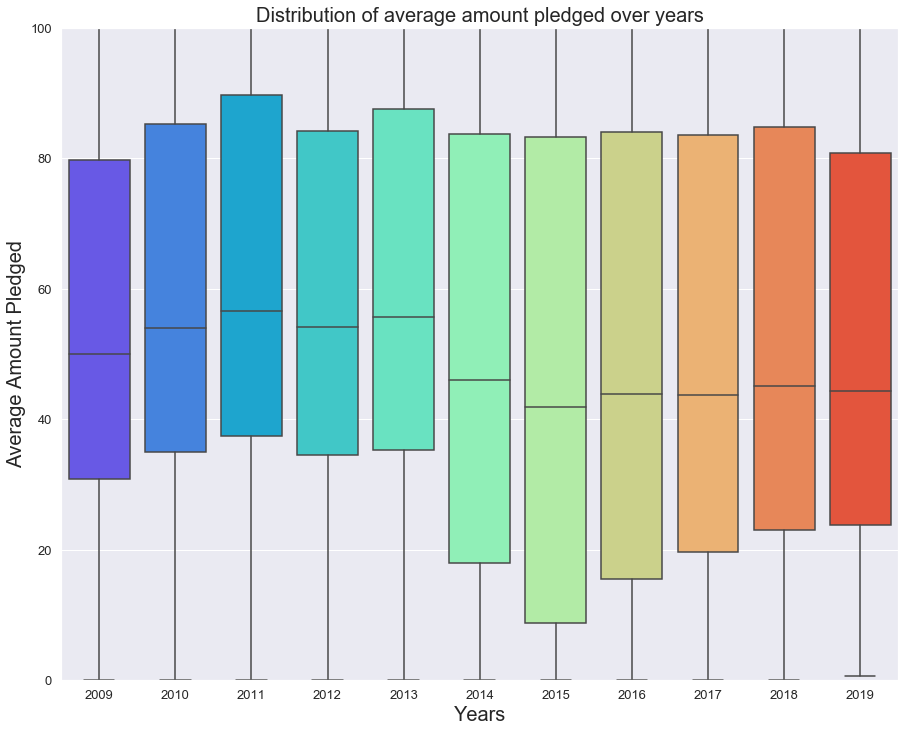

In [86]:
#All Projects
ax = sns.boxplot(x='launch_year',y='avgAmountPledged',data=d,palette='rainbow')
ax.set(ylim=(0,100))
ax.axes.set_title("Distribution of average amount pledged over years",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Average Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('avg_pledged_year.png')

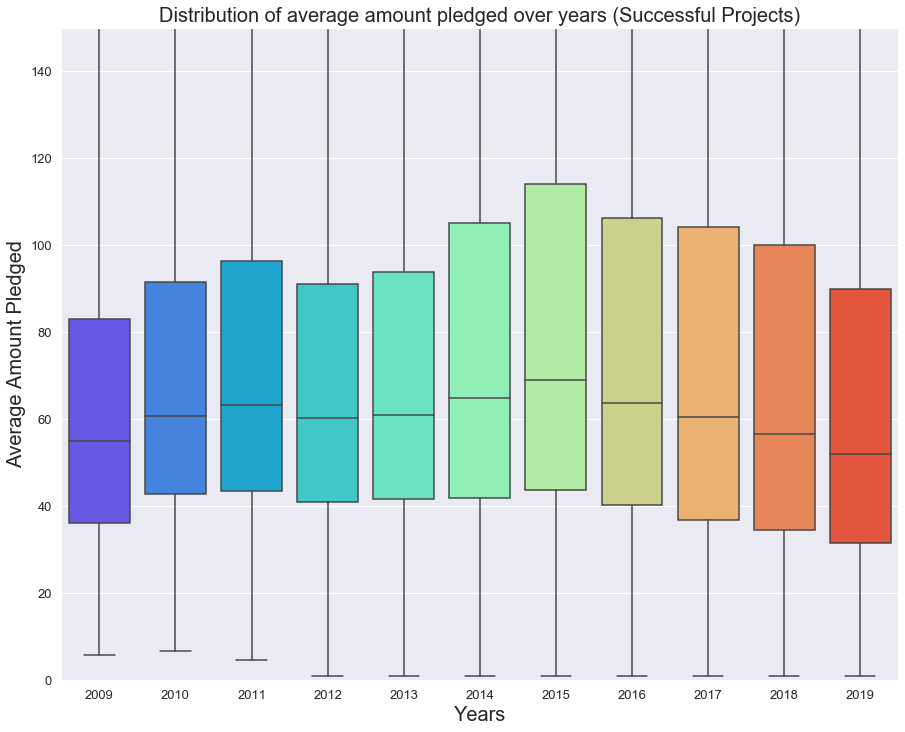

In [87]:
#Successful projects
ax = sns.boxplot(x='launch_year',y='avgAmountPledged',data=d_s,palette='rainbow')
ax.set(ylim=(0,150))
ax.axes.set_title("Distribution of average amount pledged over years (Successful Projects)",fontsize=20)
ax.set_xlabel("Years",fontsize=20)
ax.set_ylabel("Average Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('avg_pledged_year_successful.png')

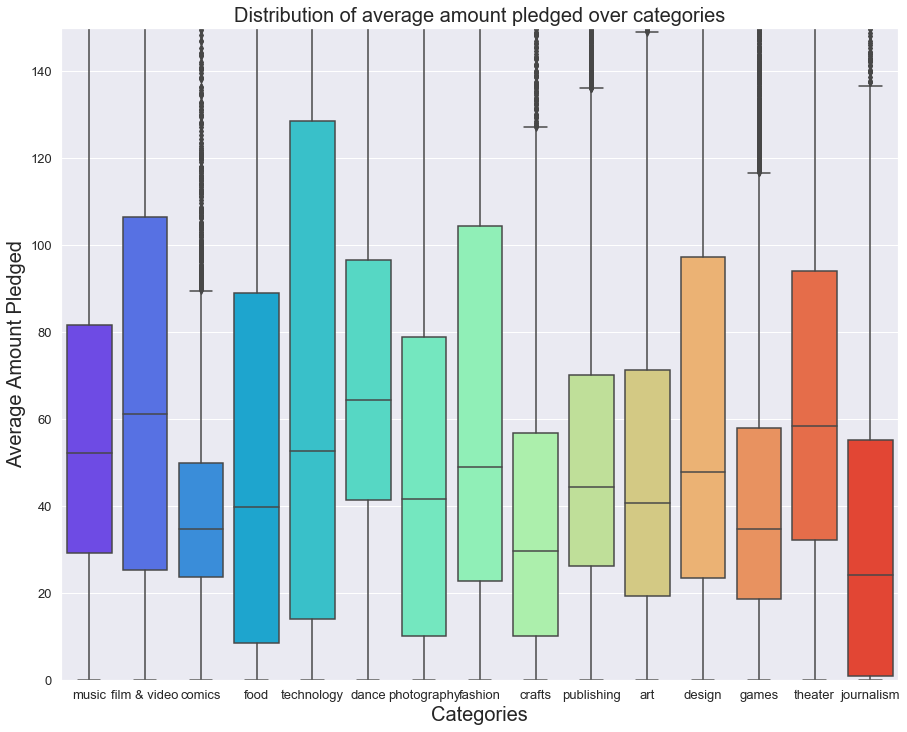

In [88]:
ax = sns.boxplot(x='category',y='avgAmountPledged',data=d,palette='rainbow')
ax.set(ylim=(0,150))
ax.axes.set_title("Distribution of average amount pledged over categories",fontsize=20)
ax.set_xlabel("Categories",fontsize=20)
ax.set_ylabel("Average Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('avg_pledged_category.png')

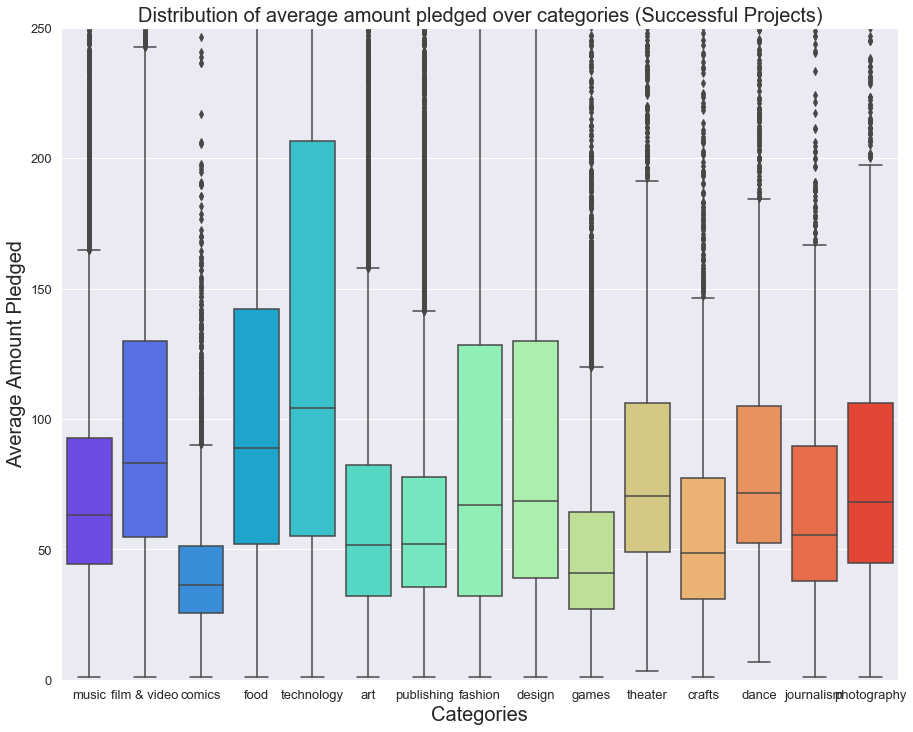

In [89]:
ax = sns.boxplot(x='category',y='avgAmountPledged',data=d_s,palette='rainbow')
ax.set(ylim=(0,250))
ax.axes.set_title("Distribution of average amount pledged over categories (Successful Projects)",fontsize=20)
ax.set_xlabel("Categories",fontsize=20)
ax.set_ylabel("Average Amount Pledged",fontsize=20)
ax.tick_params(labelsize=13)
fig = ax.get_figure()
fig.savefig('avg_pledged_category_successful.png')

In [90]:
#############Launch Year vs Number of Projects####################

In [91]:
sns.set(rc={'figure.figsize':(15,10)})
df_num=d.groupby("launch_year").size()
years_overall = df_num.index
counts_overall = df_num.values

In [92]:
df_num_s=d_s.groupby("launch_year").size()
years_succ = df_num_s.index
counts_succ = df_num_s.values

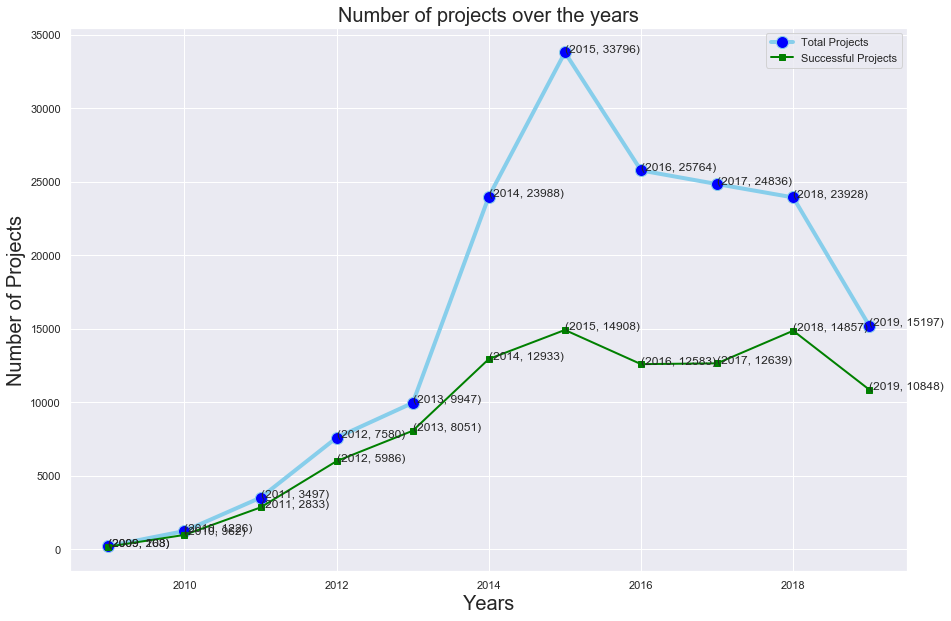

In [93]:
plt.plot( years_overall, counts_overall, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4,label="Total Projects")
for xy in zip(years_overall, counts_overall):                                      
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.plot( years_succ,counts_succ, marker='s', color='green', linewidth=2,label = "Successful Projects")
for xy in zip(years_succ, counts_succ):                                      
    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
plt.title('Number of projects over the years', fontsize=20)
plt.xlabel('Years', fontsize=20)
plt.ylabel('Number of Projects', fontsize=20)
plt.legend()
plt.savefig('num_projects.png')

In [94]:
df_num.head()

launch_year
2009     203
2010    1226
2011    3497
2012    7580
2013    9947
dtype: int64